## Exponential moving averages crossing using neural network 

To perform classification task on technical indicators these following  steps followed 

1) Install required python libraries talib , pytorch  etc.

2) Get data for portfolio stocks from Yahoo Finance API

3) Compute technical stock trading indicators using ta-lib

4) Transform technical indicators into features

5) Feed features to PyTorch neural network

6) Using sklearn split data into train and test dataset

7) Calculate strategy returns

8) Integrate strategies with pyfolio for backtesting 

## 1) Install Technical Analysis Library TA-LIB

In [ ]:
!python --version

Python 3.10.11


In [ ]:
!pip install -U numpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Working with Talib in Colab is tricky. Code will fail at import talib first. You need to restart runtime and run all.
# 2nd time it will run problem. For local once you have talib installed, you can comment talib related code.
# download TA-Lib 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 

--2023-05-25 16:34:19--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-05-25 16:34:19--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-05-25 16:34:19--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.sour

In [ ]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [ ]:
import os

In [ ]:
os.chdir('ta-lib') # Can't use !cd in co-lab

In [ ]:
!./configure --prefix=/usr

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [ ]:
!make

Making all in src
make[1]: Entering directory '/content/ta-lib/src'
Making all in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/ta-lib/src/ta_abstract'
Making all in ta_common
make[2]: Entering directory '/content/ta-lib/src/ta_common'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/ta-lib/src/ta_common'
Making all in ta_func
make[2]: Entering directory '/content/ta-lib/src/ta_func'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/ta-lib/src/ta_func'
make[2]: Entering directory '/content/ta-lib/src'
make[2]: Nothing to be done for 'all-am'.
make[2]: Leaving directory '/content/ta-lib/src'
make[1]: Leaving directory '/content/ta-lib/src'
Making all in src/tools
make[1]: Entering directory '/content/ta-lib/src/tools'
Making all in gen_code
make[2]: Entering directory '/content/ta-lib/src/tools/gen_code'
make  gen_code
make[3]: Ente

In [ ]:
!make install
# wait ~ 30s

Making install in src
make[1]: Entering directory '/content/ta-lib/src'
Making install in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /usr/bin/mkdir -p "/usr/include/ta-lib/"
 /usr/bin/install -c -m 644 '../../include/ta_defs.h' '/usr/include/ta-lib//ta_defs.h'
 /usr/bin/install -c -m 644 '../../include/ta_libc.h' '/usr/include/ta-lib//ta_libc.h'
 /usr/bin/install -c -m 644 '../../include/ta_abstract.h' '/usr/include/ta-lib//ta_abstract.h'
make[3]: Leaving directory '/content/ta-lib/src/ta_abstract'
make[2]: Leaving directory '/content/ta-lib/src/ta_abstract'
Making install in ta_common
make[2]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /usr/bin/mkdir -p "/usr/

In [ ]:
os.chdir('../')

In [ ]:
!pip install TA-Lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import talib as ta

### **TA-Lib** is widely used by trading software developers requiring to perform technical analysis of financial market data. Includes 150+ technical indicators such as ADX, MACD, RSI, Stochastic, Bollinger Bands, etc. Candlestick pattern recognition

In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Insert the directory
# Right click on SwingTrader folder from shared files and select create short cut to add at My Drive
import sys
sys.path.insert(0,'/content/drive/My Drive/SwingTrader')

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2) Get data for portfolio stocks from Yahoo Finance API

### In high level this nueral net uses three main steps Data Preparation , Model design and training strategy

### Data Preparation . download time series data from yahoo finanace and calculate technical indicators using ta-lib

### Model uses a list of tech indictors in nueral net for gradient calculation and classification of data to decide buy call

### Training strategy is split data for training and testing at 30% rate which basic can be customizable 

This model is prediction on both buy and sell using different nueral netwroks

In [ ]:
from dataloaders import get_data_from_yahoo

In [ ]:
ticker = "AAPL"

In [ ]:
start_date = "2015-01-01"
end_date = "2022-12-31"

In [ ]:
aapl = get_data_from_yahoo.get_data(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
connected to yahoo


In [ ]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531759,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840666,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177238,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106190,237458000
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674019,85438400


## 3) Compute technical stock trading indicators using ta-lib

In [ ]:
import talib as ta
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# was giving me some warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
def calculate_technical_indicators(df):
    '''This method to calculate required technical indicators of the stock price time series data. Here we are calculating Exponential moving averages for all different periods ranging from 5 , 10 days to 200 day
      '''
    df['EMA5'] = ta.EMA(df['Adj Close'].values, timeperiod=5)
    df['EMA10'] = ta.EMA(df['Adj Close'].values, timeperiod=10)
    df['EMA15'] = ta.EMA(df['Adj Close'].values, timeperiod=15)
    df['EMA20'] = ta.EMA(df['Adj Close'].values, timeperiod=10)
    df['EMA30'] = ta.EMA(df['Adj Close'].values, timeperiod=30)
    df['EMA40'] = ta.EMA(df['Adj Close'].values, timeperiod=40)
    df['EMA50'] = ta.EMA(df['Adj Close'].values, timeperiod=50)

    df['EMA60'] = ta.EMA(df['Adj Close'].values, timeperiod=60)
    df['EMA70'] = ta.EMA(df['Adj Close'].values, timeperiod=70)
    df['EMA80'] = ta.EMA(df['Adj Close'].values, timeperiod=80)
    df['EMA90'] = ta.EMA(df['Adj Close'].values, timeperiod=90)
    
    df['EMA100'] = ta.EMA(df['Adj Close'].values, timeperiod=100)
    df['EMA150'] = ta.EMA(df['Adj Close'].values, timeperiod=150)
    df['EMA200'] = ta.EMA(df['Adj Close'].values, timeperiod=200)

    df['upperBB'], df['middleBB'], df['lowerBB'] = ta.BBANDS(df['Adj Close'].values, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    df['SAR'] = ta.SAR(df['High'].values, df['Low'].values, acceleration=0.02, maximum=0.2)  
    df['RSI'] = ta.RSI(df['Adj Close'].values, timeperiod=14)
    df['normRSI'] = ta.RSI(df['Adj Close'].values, timeperiod=14) / 100.0
    
    df.tail()

    return df

In [ ]:
tech_df = calculate_technical_indicators(aapl)
tech_df

,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA10,EMA15,EMA20,...,EMA90,EMA100,EMA150,EMA200,upperBB,middleBB,lowerBB,SAR,RSI,normRSI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531759,212818400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840666,257142000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.860001,NaN,NaN
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.829851,NaN,NaN
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177238,160423600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.762957,NaN,NaN
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106190,237458000,24.299752,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.157499,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900,133.118932,135.538389,137.434163,135.538389,...,145.873306,146.408930,148.318469,149.097294,151.512131,140.252568,128.993005,141.034236,35.694655,0.356947
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800,131.963433,134.468216,136.461447,134.468216,...,145.516803,146.077118,148.071237,148.903812,151.575499,139.545128,127.514757,139.439042,33.675334,0.336753
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674019,85438400,129.866961,132.869271,135.113018,132.869271,...,145.080698,145.673096,147.774585,148.672670,152.231072,138.790825,125.350577,137.723996,29.726641,0.297266


In [ ]:
def define_target_condition(df):
 
    ''' This is custom logic or trade intution here we are using basic where Adj close price grater than exponential moving averages of 150 days'''
    
    # price above trend multiple days later
    df['target_cls'] = np.where(df['Adj Close'].shift(-34) > df.EMA150.shift(-34), 1, 0)
    df['sell_target_cls'] = np.where(df['Adj Close'].shift(-34) < df.EMA150.shift(-34), 1, 0)

    df=df.fillna(0).copy()
    
    df.tail()
    
    return df

#### EMA Crossover Strategy

In [ ]:
def calculate_features(df):
    # computes features exponential moving averages for  decision making
    df['aboveEMA5'] = np.where(df['Adj Close'] > df['EMA5'], 1, 0)
    df['aboveEMA10'] = np.where(df['Adj Close'] > df['EMA10'], 1, 0)
    df['aboveEMA15'] = np.where(df['Adj Close'] > df['EMA15'], 1, 0)
    df['aboveEMA20'] = np.where(df['Adj Close'] > df['EMA20'], 1, 0)
    df['aboveEMA30'] = np.where(df['Adj Close'] > df['EMA30'], 1, 0)
    df['aboveEMA40'] = np.where(df['Adj Close'] > df['EMA40'], 1, 0)

        
    df['aboveEMA50'] = np.where(df['Adj Close'] > df['EMA50'], 1, 0)
    df['aboveEMA60'] = np.where(df['Adj Close'] > df['EMA60'], 1, 0)
    df['aboveEMA70'] = np.where(df['Adj Close'] > df['EMA70'], 1, 0)
    df['aboveEMA80'] = np.where(df['Adj Close'] > df['EMA80'], 1, 0)
    df['aboveEMA90'] = np.where(df['Adj Close'] > df['EMA90'], 1, 0)
    
    df['aboveEMA100'] = np.where(df['Adj Close'] > df['EMA100'], 1, 0)
    df['aboveEMA150'] = np.where(df['Adj Close'] > df['EMA150'], 1, 0)
    df['aboveEMA200'] = np.where(df['Adj Close'] > df['EMA200'], 1, 0)

    df['belowEMA5'] = np.where(df['Adj Close'] <  df['EMA5'], 1, 0)
    df['belowEMA10'] = np.where(df['Adj Close'] <  df['EMA10'], 1, 0)
    df['belowEMA15'] = np.where(df['Adj Close'] <  df['EMA15'], 1, 0)
    df['belowEMA20'] = np.where(df['Adj Close'] <  df['EMA20'], 1, 0)
    df['belowEMA30'] = np.where(df['Adj Close'] <  df['EMA30'], 1, 0)
    df['belowEMA40'] = np.where(df['Adj Close'] <  df['EMA40'], 1, 0)

      
    df['belowEMA50'] = np.where(df['Adj Close'] <  df['EMA50'], 1, 0)
    df['belowEMA60'] = np.where(df['Adj Close'] <  df['EMA60'], 1, 0)
    df['belowEMA70'] = np.where(df['Adj Close'] <  df['EMA70'], 1, 0)
    df['belowEMA80'] = np.where(df['Adj Close'] <  df['EMA80'], 1, 0)
    df['belowEMA90'] = np.where(df['Adj Close'] <  df['EMA90'], 1, 0)

    df['belowEMA100'] = np.where(df['Adj Close'] <  df['EMA100'], 1, 0)
    df['belowEMA150'] = np.where(df['Adj Close'] <  df['EMA150'], 1, 0)
    df['belowEMA200'] = np.where(df['Adj Close'] <  df['EMA200'], 1, 0)

    df['aboveUpperBB'] = np.where(df['Adj Close'] > df['upperBB'], 1, 0)
    df['belowLowerBB'] = np.where(df['Adj Close'] < df['lowerBB'], 1, 0)
    
    df['aboveSAR'] = np.where(df['Adj Close'] > df['SAR'], 1, 0)
   
    df['oversoldRSI'] = np.where(df['RSI'] < 30, 1, 0)
    df['overboughtRSI'] = np.where(df['RSI'] > 70, 1, 0)


    df=df.fillna(0).copy()
    
    df.tail()

    return df

In [ ]:
df = calculate_technical_indicators(tech_df)
df = calculate_features(df)
df = define_target_condition(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA10,EMA15,EMA20,...,belowEMA100,belowEMA150,belowEMA200,aboveUpperBB,belowLowerBB,aboveSAR,oversoldRSI,overboughtRSI,target_cls,sell_target_cls
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531759,212818400,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840666,257142000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177238,160423600,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106190,237458000,24.299752,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
def plot_train_data(df):
    # plot price
    plt.figure(figsize=(15,2.5))
    plt.title('Stock data ' + str(ticker))
    plt.plot(df.index, df['Adj Close'])
    #plt.title('Price chart (Adj Close) ' + str(ticker))
    plt.show()

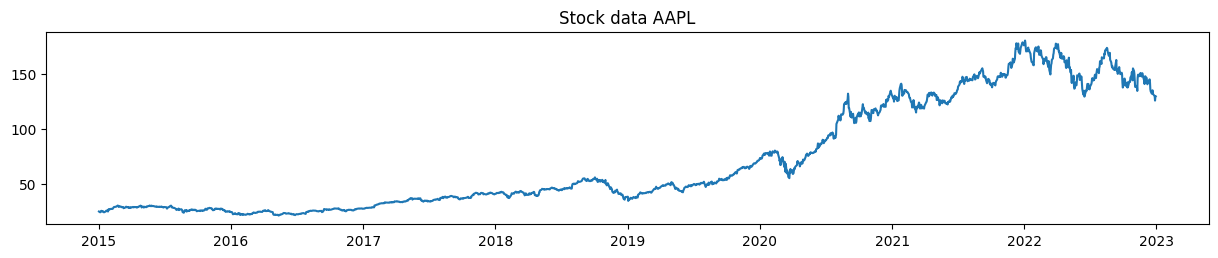

In [ ]:
plot_train_data(df)

In [ ]:
tickers = ['AAPL', 'MSFT','GOOG', 'AMZN']   

In [ ]:
import pandas as pd

#suppress 'SettingWithCopy' warning
pd.set_option('mode.chained_assignment', None)
import seaborn as sns

In [ ]:
# parent dataframe to append to
ticker = 'SPY'
df =  get_data_from_yahoo.get_data(ticker, start_date, end_date)
df = calculate_technical_indicators(df)
df = calculate_features(df)
df = define_target_condition(df)

for ticker in tickers:
    t_df = get_data_from_yahoo.get_data(ticker, start_date, end_date)
    t_df = calculate_technical_indicators(t_df)
    t_df = calculate_features(t_df)
    t_df = define_target_condition(t_df)
    
    df = pd.concat([df, t_df], ignore_index=True)

[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo


## 4) Transform technical indicators into features

In [ ]:
def split_train(df, predictors_list, test_size=0.3):
    '''This method Provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. 
    In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.
    '''
   
    X = df[predictors_list].fillna(0).values

    y_cls = df.target_cls.fillna(0).values
    #y_cls.tail(10)

    from sklearn.model_selection import train_test_split
    y=y_cls
    X_class_trained, X_class_test_data, y_class_train_data, y_class_test_data = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    print (X_class_trained.shape, y_class_train_data.shape)
    print (X_class_test_data.shape, y_class_test_data.shape)

    return X_class_trained, X_class_test_data, y_class_train_data, y_class_test_data

In [ ]:
def sell_split_train(df, predictors_list, test_size=0.3):
  
    '''This method Provides for sell model train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. 
    In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.
    '''
    X = df[predictors_list].fillna(0).values

    y_cls = df.sell_target_cls.fillna(0).values
    #y_cls.tail(10)

    from sklearn.model_selection import train_test_split
    y=y_cls
    X_class_trained, X_class_test_data, y_class_train_data, y_class_test_data = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    print (X_class_trained.shape, y_class_train_data.shape)
    print (X_class_test_data.shape, y_class_test_data.shape)

    return X_class_trained, X_class_test_data, y_class_train_data, y_class_test_data

## 5) Feed features to PyTorch neural network

In [ ]:
import numpy as np
import torch
from torch import nn
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


###  **Tensor** A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

### Pytorch three level of abstraction Tensor, Variable and Module. Tensors are just linke numpy array but can run on GPU. Variable is node in computational graph stores data and gradient. Module is nueral network layer stores state or leranable weights

### In our model we used technical analysis as classification decission makers for buy call


In [ ]:
class Model(nn.Module):
    ''' The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but also hold internal state such as 
    Tensors containing learnable parameters. The nn package also defines a set of useful loss functions used when training neural networks.  '''

    def __init__(self, input_dim):
        '''  In the constructor we instantiate layers and assign them as member parameters. '''
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim,100)
        self.layer2 = nn.Linear(100, 30)  #nn.Linear creates a callable object, m, such that o=m(i) treats each row of i as a vector, and generates a corresponding row of o using the operation:
        self.layer3 = nn.Linear(30, 2)
        self.drop = nn.Dropout(0.2)   # During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. 
                                     #Each channel will be zeroed out independently on every forward call
        
    def forward(self, x):
        '''
        In the forward function we accept a Tensor of input data and we must return
          a Tensor of output data. We can use Modules defined in the constructor as
          well as arbitrary operators on Tensors.
        '''
        x = F.relu(self.layer1(x))
        x = self.drop(x)
        x = F.relu(self.layer2(x))  #Applies the rectified linear unit function element-wise
        x = self.drop(x)
        x = F.softmax(self.layer3(x)) # need to check with the loss function
        return x

In [ ]:
''' These are list of predictors used to classify the data for sell call and get features of the model '''
sell_predictors_list = ['aboveUpperBB','overboughtRSI',
                   'aboveEMA5','aboveEMA10','aboveEMA15','aboveEMA20','aboveEMA30','aboveEMA40',
                   'aboveEMA50','aboveEMA60','aboveEMA70','aboveEMA80','aboveEMA90','aboveEMA100']

In [ ]:
''' These are list of predictors used to classify the data for buy call and get features of the model '''

buy_predictors_list = ['belowLowerBB','oversoldRSI',
                   'belowEMA5','belowEMA10','belowEMA15','belowEMA20','belowEMA30','belowEMA40',
                   'belowEMA50','belowEMA60','belowEMA70','belowEMA80','belowEMA90','belowEMA100']

## 6) Using sklearn split data into train and test dataset

In [ ]:
sell_features_train,sell_features_test, sell_labels_train, sell_labels_test = sell_split_train(df, sell_predictors_list)

(7049, 14) (7049,)
(3021, 14) (3021,)


In [ ]:
features_train,features_test, labels_train, labels_test = split_train(df, buy_predictors_list)

(7049, 14) (7049,)
(3021, 14) (3021,)


In [ ]:
features_train[:3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
labels_train[:3]

array([1, 1, 1])

In [ ]:
# make data tensors
features_train = Variable(torch.Tensor(features_train).float())
features_test  = Variable(torch.Tensor(features_test).float())
labels_train   = Variable(torch.Tensor(labels_train).long())
labels_test    = Variable(torch.Tensor(labels_test).long())

x_train = features_train
y_train = labels_train

In [ ]:
# make data tensors
sell_features_train = Variable(torch.Tensor(sell_features_train).float())
sell_features_test  = Variable(torch.Tensor(sell_features_test).float())
sell_labels_train   = Variable(torch.Tensor(sell_labels_train).long())
sell_labels_test    = Variable(torch.Tensor(sell_labels_test).long())

sell_x_train = sell_features_train
sell_y_train = sell_labels_train

In [ ]:
''' the output of the neural net will be 1 or 0 (Buy or Not Buy). Based on the input features the network and it predict whether price will be in n 
days above specific moving average this logic is customizable by slecting technical indicators. This requires fine tuning '''
# Training
model = Model(features_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = nn.CrossEntropyLoss()
epochs = 150

def print_loss(loss):
    print ("The loss calculated: ", loss)

#### Train Data

In [ ]:
for epoch in range(1, epochs+1):
    print ("Epoch #",epoch)
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    print_loss(loss.item())
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward() # Gradients
    optimizer.step() # Update

Epoch # 1
The loss calculated:  0.6920796632766724
Epoch # 2
The loss calculated:  0.6768016815185547
Epoch # 3
The loss calculated:  0.6622611880302429
Epoch # 4
The loss calculated:  0.6456288695335388
Epoch # 5
The loss calculated:  0.6293123960494995
Epoch # 6
The loss calculated:  0.6143014430999756
Epoch # 7
The loss calculated:  0.5978862047195435
Epoch # 8
The loss calculated:  0.5831835269927979
Epoch # 9
The loss calculated:  0.5700288414955139
Epoch # 10
The loss calculated:  0.5561071634292603
Epoch # 11
The loss calculated:  0.5452202558517456
Epoch # 12


<ipython-input-460-d35afd2aa48f>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


The loss calculated:  0.5348365902900696
Epoch # 13
The loss calculated:  0.5247625708580017
Epoch # 14
The loss calculated:  0.5187495350837708
Epoch # 15
The loss calculated:  0.5125081539154053
Epoch # 16
The loss calculated:  0.5093541145324707
Epoch # 17
The loss calculated:  0.5075435638427734
Epoch # 18
The loss calculated:  0.5052062273025513
Epoch # 19
The loss calculated:  0.5022878050804138
Epoch # 20
The loss calculated:  0.5011464953422546
Epoch # 21
The loss calculated:  0.50054532289505
Epoch # 22
The loss calculated:  0.5004281401634216
Epoch # 23
The loss calculated:  0.4994335174560547
Epoch # 24
The loss calculated:  0.4996877908706665
Epoch # 25
The loss calculated:  0.4998510777950287
Epoch # 26
The loss calculated:  0.49917685985565186
Epoch # 27
The loss calculated:  0.49814653396606445
Epoch # 28
The loss calculated:  0.49886658787727356
Epoch # 29
The loss calculated:  0.49882328510284424
Epoch # 30
The loss calculated:  0.49834349751472473
Epoch # 31
The loss 

In [ ]:
# Prediction

x_test = features_test

pred = model(x_test)

<ipython-input-460-d35afd2aa48f>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


In [ ]:
pred = pred.detach().numpy()
pred

array([[1.3124680e-05, 9.9998689e-01],
       [8.0899488e-05, 9.9991906e-01],
       [1.0034170e-05, 9.9998999e-01],
       ...,
       [3.5779689e-05, 9.9996424e-01],
       [6.3310786e-06, 9.9999368e-01],
       [6.3039032e-08, 9.9999988e-01]], dtype=float32)

In [ ]:
print ("The accuracy is", accuracy_score(labels_test, np.argmax(pred, axis=1)))

The accuracy is 0.7980801059251903


In [ ]:
# Checking for first value
np.argmax(model(x_test[0]).detach().numpy(), axis=0)

<ipython-input-460-d35afd2aa48f>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


1

In [ ]:
''' the output of the neural net will be 1 or 0 (Sell or Not Sell). Based on the input features the network and it predict whether price will be in n 
days above specific moving average this logic is customizable by slecting technical indicators. This requires fine tuning '''
# Training
sell_model = Model(sell_features_train.shape[1])
optimizer = torch.optim.Adam(sell_model.parameters(), lr=0.005)
loss_fn = nn.CrossEntropyLoss()
epochs = 150

def print_loss(loss):
    print ("The loss calculated for sell : ", loss)

In [ ]:
''' Epoch: An epoch refers to one cycle through the full training dataset.   '''
for epoch in range(1, epochs+1):
    print ("Epoch #",epoch)
    sell_y_pred = sell_model(sell_x_train)
    sell_loss = loss_fn(sell_y_pred, sell_y_train)
    print_loss(sell_loss.item())
    
    # Zero gradients
    optimizer.zero_grad()
    sell_loss.backward() # Gradients
    optimizer.step() # Update

Epoch # 1
The loss calculated for sell :  0.7421047687530518
Epoch # 2
The loss calculated for sell :  0.6869445443153381
Epoch # 3
The loss calculated for sell :  0.6455309391021729


<ipython-input-460-d35afd2aa48f>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


Epoch # 4
The loss calculated for sell :  0.6090161800384521
Epoch # 5
The loss calculated for sell :  0.5754656195640564
Epoch # 6
The loss calculated for sell :  0.5487769246101379
Epoch # 7
The loss calculated for sell :  0.5300908088684082
Epoch # 8
The loss calculated for sell :  0.5178825855255127
Epoch # 9
The loss calculated for sell :  0.5114015936851501
Epoch # 10
The loss calculated for sell :  0.5079053640365601
Epoch # 11
The loss calculated for sell :  0.5063086152076721
Epoch # 12
The loss calculated for sell :  0.5063796043395996
Epoch # 13
The loss calculated for sell :  0.5064340829849243
Epoch # 14
The loss calculated for sell :  0.5066418647766113
Epoch # 15
The loss calculated for sell :  0.5066001415252686
Epoch # 16
The loss calculated for sell :  0.5061721801757812
Epoch # 17
The loss calculated for sell :  0.5070490837097168
Epoch # 18
The loss calculated for sell :  0.5069379806518555
Epoch # 19
The loss calculated for sell :  0.5068109035491943
Epoch # 20
The

In [ ]:
# Prediction

sell_x_test = sell_features_test

sell_pred = sell_model(sell_x_test)

<ipython-input-460-d35afd2aa48f>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


In [ ]:
sell_pred = sell_pred.detach().numpy()
sell_pred

array([[1.0000000e+00, 1.9006823e-13],
       [1.0000000e+00, 4.4736973e-14],
       [1.0000000e+00, 6.6424622e-14],
       ...,
       [7.2469908e-01, 2.7530089e-01],
       [1.0000000e+00, 4.5793142e-15],
       [1.0000000e+00, 1.4149115e-11]], dtype=float32)

In [ ]:
print ("The accuracy for sell model is", accuracy_score(sell_labels_test, np.argmax(sell_pred, axis=1)))

The accuracy for sell model is 0.7941079112876531


In [ ]:
def predict_buy_from_timeseries(df):
  
    ''' This method is to predict buy using the multiple technical indicators combined over sold RSI , below lower boiling banders above exponential moving averages   '''

    df['Buy'] = df['target_cls']
    
    for i in range(len(df)):
        X_cls_valid = [[df['belowLowerBB'][i],
                        df['oversoldRSI'][i],
                        df['belowEMA5'][i],df['belowEMA10'][i],df['belowEMA15'][i],df['belowEMA20'][i],
                        df['belowEMA30'][i],df['belowEMA40'][i],df['belowEMA50'][i],
                        df['belowEMA60'][i],df['belowEMA70'][i],df['belowEMA80'][i],df['belowEMA90'][i],
                        df['belowEMA100'][i]]]   

        x_test = Variable(torch.Tensor(X_cls_valid).float())    
        
        prediction = np.argmax(model(x_test[0]).detach().numpy(), axis=0)
      
  
    
        df['Buy'][i] = prediction


    print(df.head())    
        
    return df

In [ ]:
def predict_sell_from_timeseries(df):
    
    ''' This method is to predict sell using the multiple technical indicators combined over sold RSI , below lower boiling banders above exponential moving averages   '''

    df['Sell'] = df['sell_target_cls']
    
    for i in range(len(df)):
        X_cls_valid = [[df['aboveUpperBB'][i],
                        df['overboughtRSI'][i],                     
                        df['aboveEMA5'][i],df['aboveEMA10'][i],df['aboveEMA15'][i],df['aboveEMA20'][i],
                        df['aboveEMA30'][i],df['aboveEMA40'][i],df['aboveEMA50'][i],
                        df['aboveEMA60'][i],df['aboveEMA70'][i],df['aboveEMA80'][i],df['aboveEMA90'][i],
                        df['aboveEMA100'][i]]]  

        x_test = Variable(torch.Tensor(X_cls_valid).float())    
             
        prediction = np.argmax(sell_model(x_test[0]).detach().numpy(), axis=0)
         
    
        df['Sell'][i] = prediction


    print(df.head())    
        
    return df

In [ ]:
new_df = predict_buy_from_timeseries(t_df)

<ipython-input-460-d35afd2aa48f>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


               Open     High      Low    Close  Adj Close    Volume     EMA5  EMA10  EMA15  EMA20  ...  belowEMA150  belowEMA200  aboveUpperBB  belowLowerBB  aboveSAR  oversoldRSI  overboughtRSI  target_cls  sell_target_cls  Buy
Date                                                                                               ...                                                                                                                              
2015-01-02  15.6290  15.7375  15.3480  15.4260    15.4260  55664000   0.0000    0.0    0.0    0.0  ...            0            0             0             0         0            0              0           1                0    1
2015-01-05  15.3505  15.4190  15.0425  15.1095    15.1095  55484000   0.0000    0.0    0.0    0.0  ...            0            0             0             0         0            0              0           1                0    1
2015-01-06  15.1120  15.1500  14.6190  14.7645    14.7645  70380000   0.0000    0.0 

In [ ]:
new_df = predict_sell_from_timeseries(new_df)

<ipython-input-460-d35afd2aa48f>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


               Open     High      Low    Close  Adj Close    Volume     EMA5  EMA10  EMA15  EMA20  ...  belowEMA200  aboveUpperBB  belowLowerBB  aboveSAR  oversoldRSI  overboughtRSI  target_cls  sell_target_cls  Buy  Sell
Date                                                                                               ...                                                                                                                       
2015-01-02  15.6290  15.7375  15.3480  15.4260    15.4260  55664000   0.0000    0.0    0.0    0.0  ...            0             0             0         0            0              0           1                0    1     0
2015-01-05  15.3505  15.4190  15.0425  15.1095    15.1095  55484000   0.0000    0.0    0.0    0.0  ...            0             0             0         0            0              0           1                0    1     0
2015-01-06  15.1120  15.1500  14.6190  14.7645    14.7645  70380000   0.0000    0.0    0.0    0.0  ...          

In [ ]:
#print(df.loc[(df['belowEMA7'] == 1) & (df['aboveEMA200'] == 1)])
print(new_df.loc[(new_df['Buy'] == 1)])

                  Open        High         Low       Close   Adj Close     Volume        EMA5       EMA10       EMA15       EMA20  ...  belowEMA200  aboveUpperBB  belowLowerBB  aboveSAR  oversoldRSI  overboughtRSI  target_cls  sell_target_cls  Buy  Sell
Date                                                                                                                               ...                                                                                                                       
2015-01-02   15.629000   15.737500   15.348000   15.426000   15.426000   55664000    0.000000    0.000000    0.000000    0.000000  ...            0             0             0         0            0              0           1                0    1     0
2015-01-05   15.350500   15.419000   15.042500   15.109500   15.109500   55484000    0.000000    0.000000    0.000000    0.000000  ...            0             0             0         0            0              0           1             

In [ ]:
print(new_df.loc[(new_df['Sell'] == 1)])

                  Open        High         Low       Close   Adj Close     Volume        EMA5       EMA10       EMA15       EMA20  ...  belowEMA200  aboveUpperBB  belowLowerBB  aboveSAR  oversoldRSI  overboughtRSI  target_cls  sell_target_cls  Buy  Sell
Date                                                                                                                               ...                                                                                                                       
2016-11-10   38.940498   38.941502   35.884998   37.118999   37.118999  254940000   38.280693   38.806245   39.203728   38.806245  ...            0             0             1         0            0              0           1                0    0     1
2017-10-03   47.900002   48.184502   47.518501   47.855000   47.855000   53332000   47.848122   47.933243   48.054182   47.933243  ...            0             0             0         1            0              0           1             

In [ ]:
def plot_stock_prediction(df, ticker):
    # plot  values and significant levels
    plt.figure(figsize=(30,7))
    plt.title('Predictive model ' + str(ticker))
    plt.plot(df.index, df['Adj Close'], label='Adj Close', alpha=0.2)

    plt.plot(df.index, df['EMA10'], label='EMA10', alpha=0.2)
    plt.plot(df.index, df['EMA20'], label='EMA20', alpha=0.2)
    plt.plot(df.index, df['EMA30'], label='EMA30', alpha=0.2)
    plt.plot(df.index, df['EMA40'], label='EMA40', alpha=0.2)
    plt.plot(df.index, df['EMA50'], label='EMA50', alpha=0.2)
    plt.plot(df.index, df['EMA100'], label='EMA100', alpha=0.2)
    plt.plot(df.index, df['EMA150'], label='EMA150', alpha=0.99)
    plt.plot(df.index, df['EMA200'], label='EMA200', alpha=0.2)


    plt.scatter(df.index, df['Buy']*df['Adj Close'], label='Buy', marker='^', color='blue', alpha=0.15)
    plt.scatter(df.index, df['Sell']*df['Adj Close'], label='Sell', marker='^', color='red', alpha=0.15)
    #lt.scatter(df.index, df['sell_sig'], label='Sell', marker='v')

    plt.legend()

    plt.show()

    return None

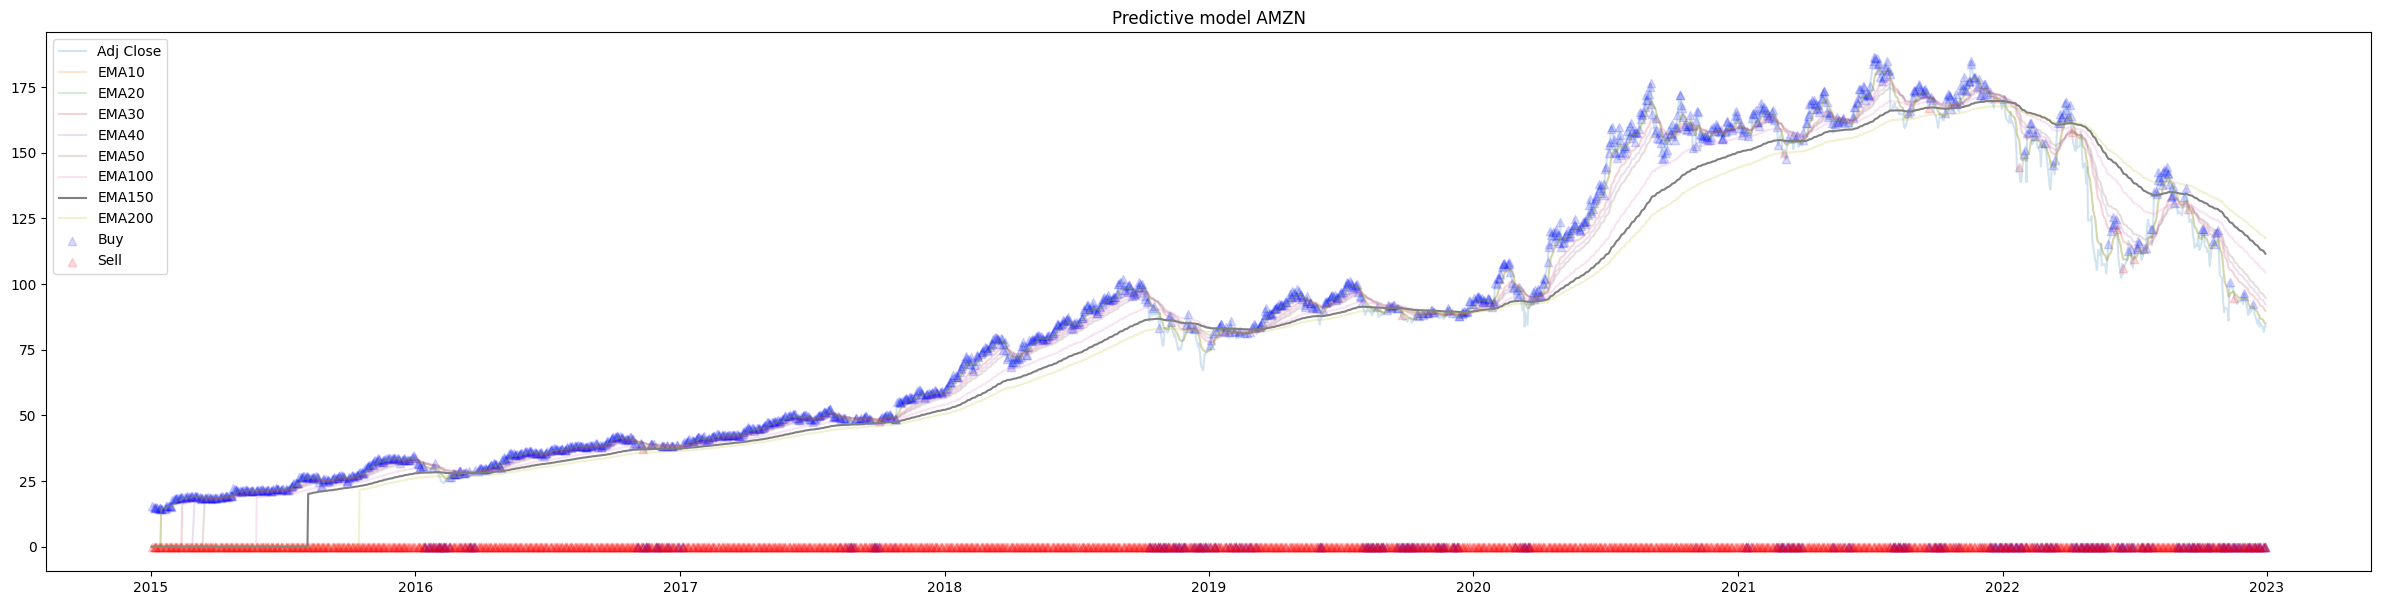

In [ ]:
plot_stock_prediction(new_df, ticker)

In [ ]:
# zoom in on the data
temp_df = new_df[-2000:-1000]

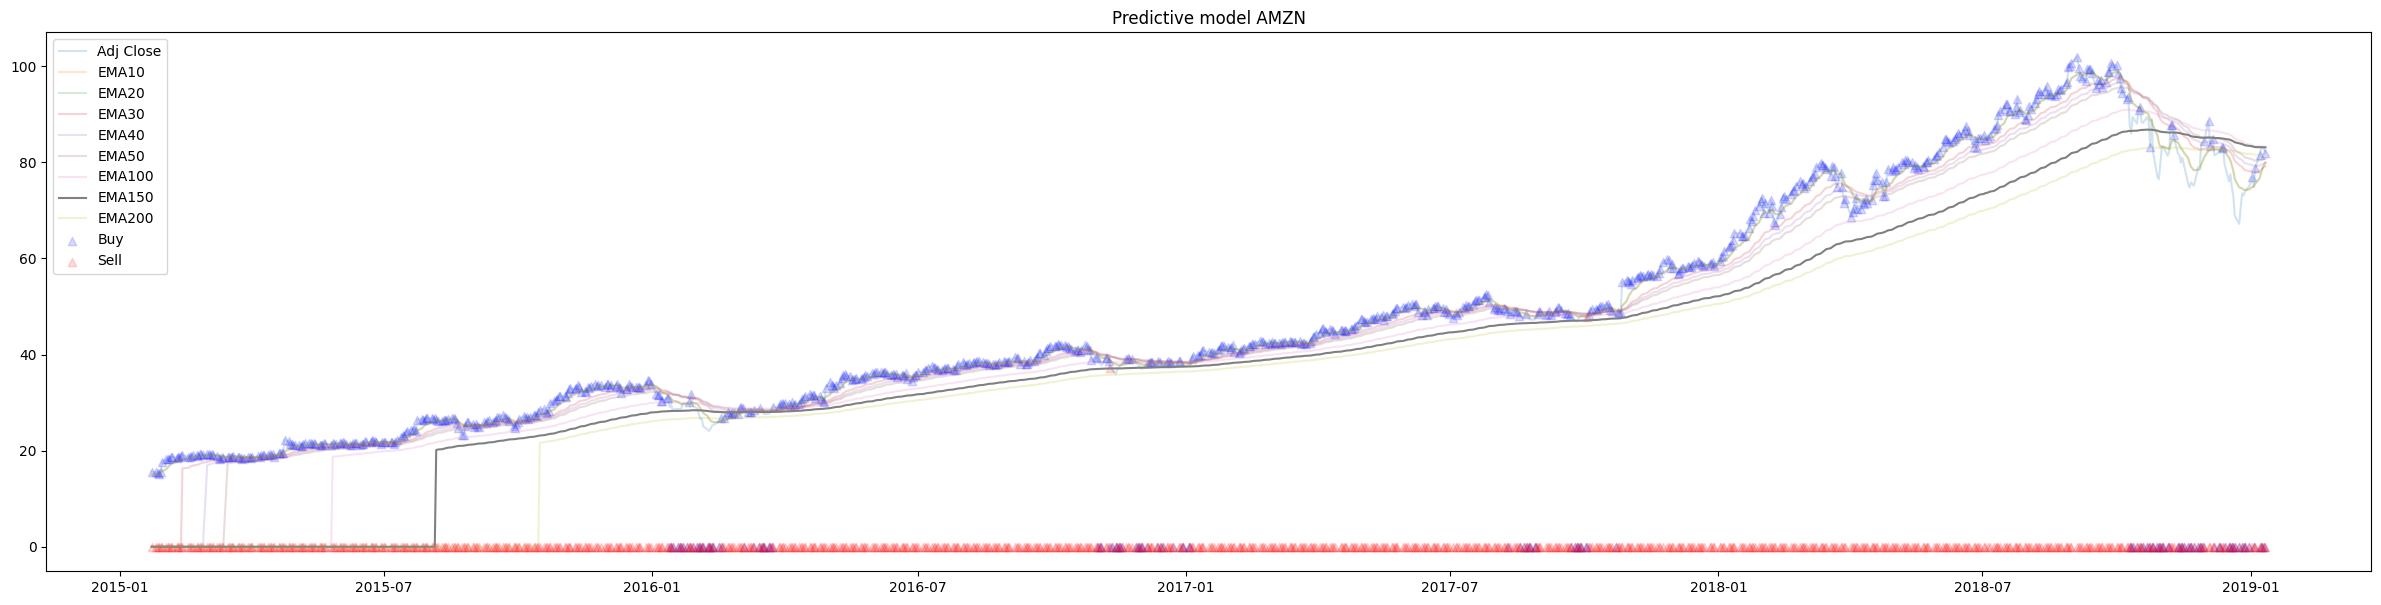

In [ ]:
plot_stock_prediction(temp_df, ticker)

## 7) Calculate strategy returns 

### **Strategy** . This is primitive approach to get best returns here based on our model prediction Buy call and based on targetted return we do a sell call and calculate the return . This customizable and extendable with more iterations for the best returns . In current scope with less number of trades and long term investing we calculated returs for backtesting using pyfolio.

In [ ]:
def returns(book):
    # profit and loss calculation x x x x
    rtn = 0.0
    book['return'] = 0.0
    buy = 0.0
    sell = 0.0
    #strat_returns =  book[['Adj Close']].copy() #pd.DataFrame(columns=['Adj Close'])
    #print(strat_returns)
    for date in book.index:
        if book.loc[date, 'Buy'] == 1 and buy == 0 :     # long enter  and book.shift(1).loc[date, 'Buy'] == 0
            #if book.loc[date, 'Adj Close'] > buy:
            print('current buy position at '+ str(buy )+ ' new buy opetion price'+ str(book.loc[date, 'Adj Close'] ) )
            buy = book.loc[date, 'Adj Close']
            dt = date
              #new_row = {'Date' : dt ,'Adj Close' : buy }
              #strat_returns.append(new_row)
              #strat_returns = pd.concat([strat_returns, pd.Series([dt,buy])])              #   strat_returns.append(pd.Series([dt,buy] ,index=strat_returns.columns), ignore_index=True)
            print('entry date : ',dt, 'long entry price : ', buy)
        if book.loc[date, 'Sell'] == 1   :     # long clearing and book.shift(1).loc[date, 'Buy'] == 1 
            sell = book.loc[date, 'Adj Close']
            if sell > buy and buy != 0 and (sell - buy) > 0.05 :
            #if  buy != 0 :
              rtn = (sell - buy) / buy ### ????? why ????   + 1 # profit and loss calculation
              book.loc[date, 'return'] = round(rtn, 4)
              dt = date
              
              #new_row = {'Date' : dt ,'Adj Close' : sell }
              #strat_returns.append(new_row)
              if rtn > 0 :
                #strat_returns = strat_returns.append(pd.Series([dt,buy] ,index=strat_returns.columns), ignore_index=True)
                print('liquidation date : ',dt, 'long entry price : ', buy, ' |  long liquidation price : ', \
                    sell, ' | return:', round(rtn, 4)) 
              buy = 0
    
  
    acc_rtn = 1.0
    for date in book.index:
        rtn = book.loc[date, 'return']
        acc_rtn = acc_rtn * rtn  # Calculate cumulative return
        book.loc[date, 'acc return'] = acc_rtn

    #print ('Accunulated return :', round(acc_rtn, 4))
    #print(strat_returns)
    return (round(acc_rtn, 4)) , book

In [ ]:
accumulated_returns , book = returns(new_df)

current buy position at 0.0 new buy opetion price15.425999641418457
entry date :  2015-01-02 00:00:00 long entry price :  15.425999641418457
liquidation date :  2016-11-10 00:00:00 long entry price :  15.425999641418457  |  long liquidation price :  37.11899948120117  | return: 1.4063
current buy position at 0 new buy opetion price39.0
entry date :  2016-11-21 00:00:00 long entry price :  39.0
liquidation date :  2017-10-03 00:00:00 long entry price :  39.0  |  long liquidation price :  47.85499954223633  | return: 0.2271
current buy position at 0 new buy opetion price48.272499084472656
entry date :  2017-10-04 00:00:00 long entry price :  48.272499084472656
liquidation date :  2019-09-25 00:00:00 long entry price :  48.272499084472656  |  long liquidation price :  88.41649627685547  | return: 0.8316
current buy position at 0 new buy opetion price88.36900329589844
entry date :  2019-10-15 00:00:00 long entry price :  88.36900329589844
liquidation date :  2021-03-05 00:00:00 long entry 

In [ ]:
book['return']

Date
2015-01-02    0.0
2015-01-05    0.0
2015-01-06    0.0
2015-01-07    0.0
2015-01-08    0.0
             ... 
2022-12-23    0.0
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
Name: return, Length: 2014, dtype: float64

In [ ]:
print(book['return'].loc[book['return'] != 0.0])

Date
2016-11-10    1.4063
2017-10-03    0.2271
2019-09-25    0.8316
2021-03-05    0.6977
2021-09-21    0.1327
2021-12-22    0.0014
Name: return, dtype: float64


In [ ]:
new_df['daily_return'] = new_df['Adj Close'].pct_change()

In [ ]:
new_df['daily_return'].head()

Date
2015-01-02         NaN
2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-08    0.006836
Name: daily_return, dtype: float64

In [ ]:
new_df['st_return'] = (1+new_df['daily_return']).cumprod()

In [ ]:
new_df['return'].cummax()

Date
2015-01-02    0.0000
2015-01-05    0.0000
2015-01-06    0.0000
2015-01-07    0.0000
2015-01-08    0.0000
               ...  
2022-12-23    1.4063
2022-12-27    1.4063
2022-12-28    1.4063
2022-12-29    1.4063
2022-12-30    1.4063
Name: return, Length: 2014, dtype: float64

<Axes: xlabel='Date'>

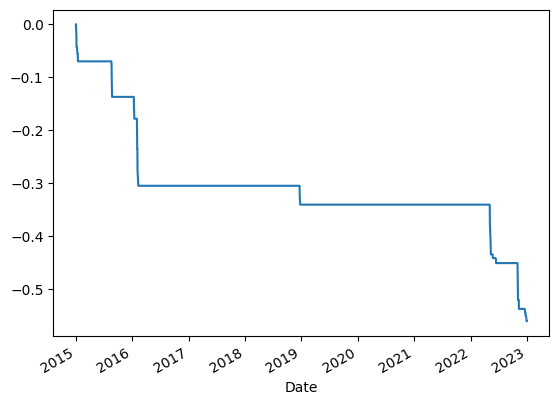

In [ ]:
historical_max = new_df['Adj Close'].cummax()
daily_drawdown = new_df['Adj Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [ ]:
#CAGR = new_df.loc['2019-06-24','st_return'] ** (252./len(new_df.index)) -1
Sharpe = np.mean(new_df['daily_return']) / np.std(new_df['daily_return']) * np.sqrt(252.)
VOL = np.std(new_df['daily_return']) * np.sqrt(252.)
MDD = historical_dd.min()

In [ ]:
#print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe of buy and hold strategy : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

Sharpe of buy and hold strategy :  0.8
VOL :  33.29 %
MDD :  56.15 %


In [ ]:
new_df.shape

(2014, 67)

<Axes: xlabel='Date'>

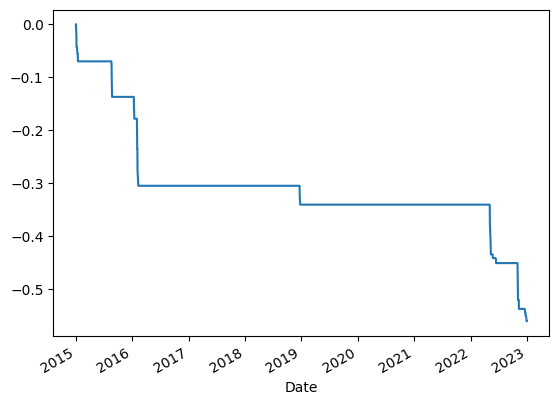

In [ ]:
strat_historical_max = book['Adj Close'].cummax()
strat_drawdown = book['Adj Close'] / strat_historical_max - 1.0
strat_historical_dd = strat_drawdown.cummin()
strat_historical_dd.plot()

In [ ]:
Sharpe_exp_ma = np.mean(book['return']) / np.std(book['return']) * np.sqrt(252.)
VOL_exp_ma = np.std(book['return']) * np.sqrt(252.)
MDD_exp_ma = strat_historical_dd.min()

In [ ]:
print('Sharpe of buy exponential strategy : ',round(Sharpe_exp_ma,2))
print('VOLexponential strategy : ',round(VOL_exp_ma*100,2),'%')
print('MDD : ',round(-1*MDD_exp_ma*100,2),'%')

Sharpe of buy exponential strategy :  0.65
VOLexponential strategy :  63.47 %
MDD :  56.15 %


## 8) Integrate strategies with pyfolio for backtesting 

### **pyfolio** is a Python library for performance and risk analysis of financial portfolios that works well with the Zipline open source backtesting library  . At the core of pyfolio are various tear sheets that combine various individual plots and summary statistics to provide a comprehensive view of the performance of a trading algorithm.

In [ ]:
#!pip install git+https://github.com/quantopian/pyfolio

In [ ]:
#import pyfolio as pf

In [ ]:
new_df['daily_return'].head()

Date
2015-01-02         NaN
2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-08    0.006836
Name: daily_return, dtype: float64

In [ ]:
#pf.create_returns_tear_sheet(strat_returns['returns'])

In [ ]:
!pip install pyfolio-reloaded

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyfolio as pf

**Peformance statistics**

**Annual Returns:** % annual returns

**Cum Returns Final:** % cummulative returns in last 10 years

**Annual volatility:** % annual volatility (risk)

**Sharp Ratio:** Compares performance of an asset w.r.t risk free asset.

**Calmar Ratio:**
Compounded annual growth rate divided by the maximum drawdown.
The maximum drawdown is the maximum peak to trough of the returns measured over a three year period.

**Max drawdown:** Highest percentage loss from the previous peak

**Calmar ratio:** Annual portfolio return relative to maximal drawdown

**Omega ratio:** Probability-weighted ratio of gains versus losses for a return target, zero per default

**Sortino ratio:** Excess return relative to downside standard deviation
Tail ratio: Size of the right tail (gains, the absolute value of the 95th percentile) relative to the size of the left tail (losses, absolute value of the 5th percentile)

**Daily value at risk (VaR):** Loss corresponding to a return two standard deviations below the daily mean

**Alpha:** Portfolio return unexplained by the benchmark return
Beta: Exposure to the benchmark

/usr/local/lib/python3.10/dist-packages/empyrical/stats.py:1412: RuntimeWarning: invalid value encountered in scalar divide
  return np.abs(np.percentile(returns, 95)) / np.abs(np.percentile(returns, 5))


Start date,2015-01-02
End date,2022-12-30
Total months,95
,Backtest
Annual return,34.07%
Cumulative returns,941.463%
Annual volatility,63.488%
Sharpe ratio,0.65
Calmar ratio,NaN
Stability,0.94
Max drawdown,0.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.00,2015-01-02,2015-01-02,2015-01-02,1
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


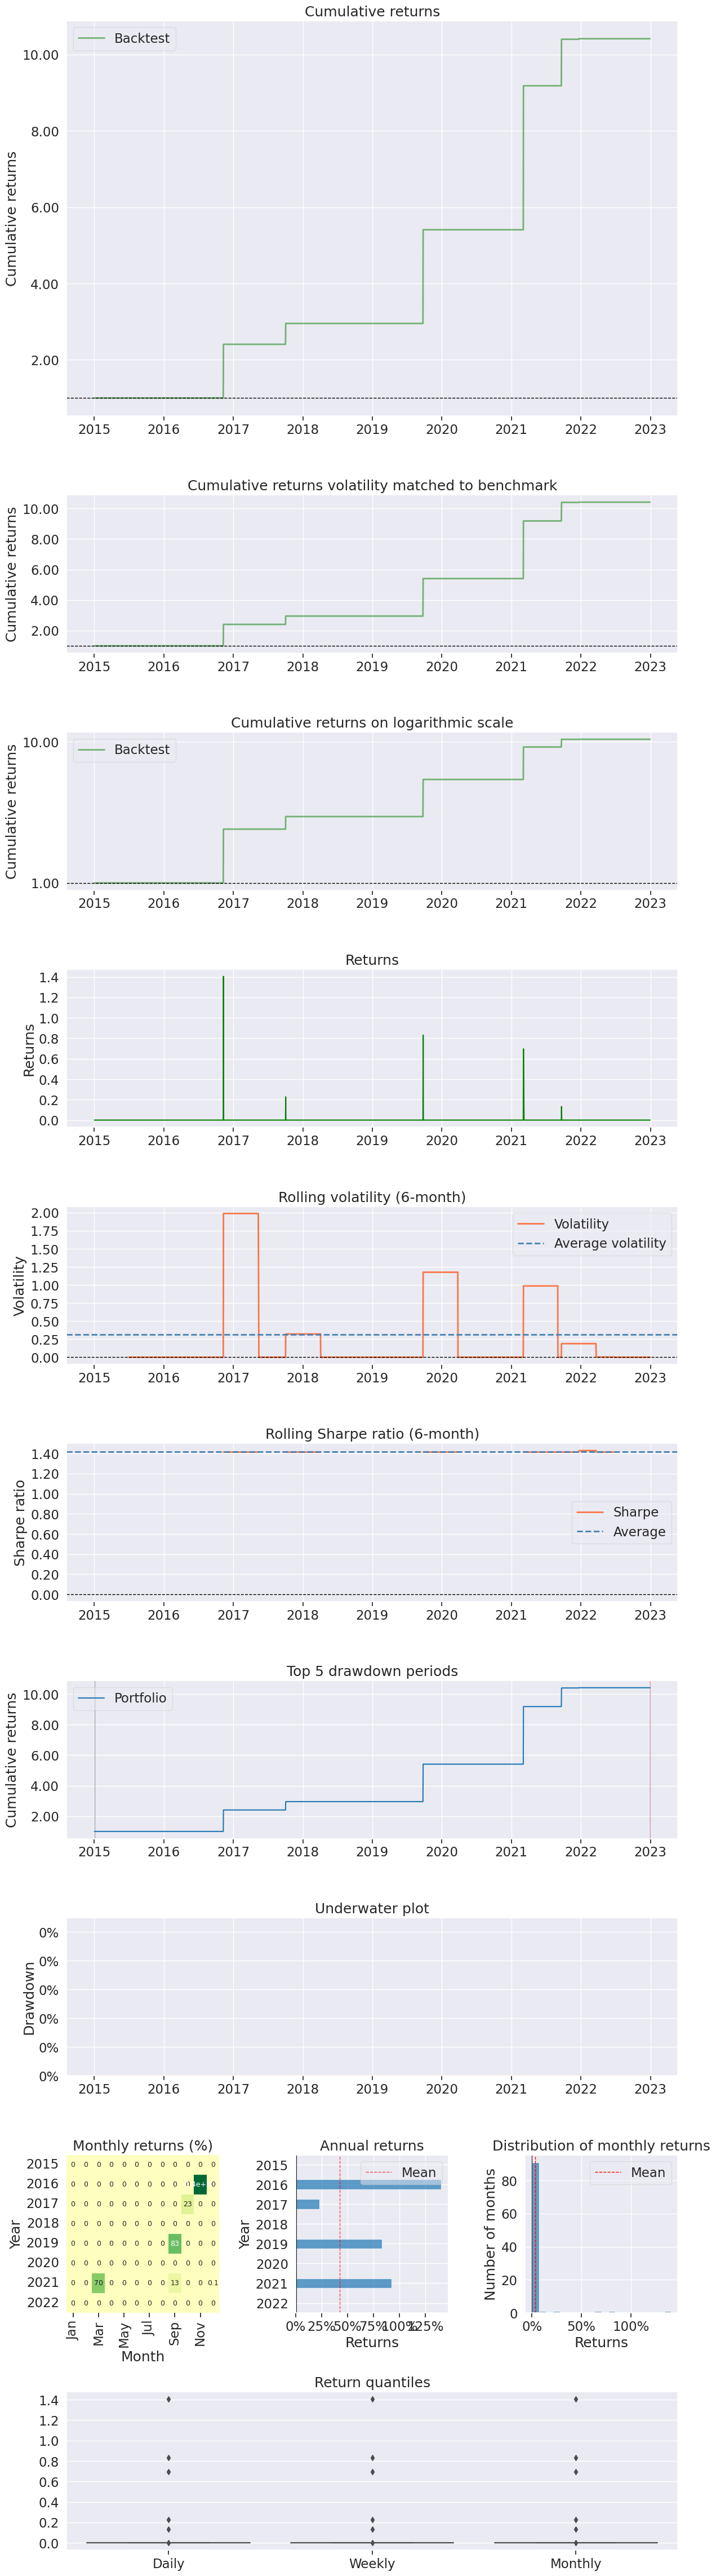

In [ ]:
pf.create_returns_tear_sheet(book['return'])#strat_returns['returns'])  #,live_start_date='2016-01-01')

In [ ]:
import yfinance as yf
#  Retrieve asset info
symbol = 'AAPL'
AAPL_yahoo_info = yf.Ticker(symbol)
AAPL_history = AAPL_yahoo_info.history(period="10y")
#tsla_history.index = tsla_history.index.tz_localize('utc')
#  Calculate returns
AAPL_returns = AAPL_history.Close.pct_change()
print(type(AAPL_returns.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
#  Retrieve asset info
symbol = 'SPY'
SPY_yahoo_info = yf.Ticker(symbol)
#print(SPY_yahoo_info)
SPY_history = SPY_yahoo_info.history(period="10y")
print(type(SPY_history.index))
print(SPY_history)
#ndx_history.index = ndx_history.index.tz_localize('utc')
#  Calculate returns
SPY_returns = SPY_history.Close.pct_change()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                                 Open        High         Low       Close     Volume  Dividends  Stock Splits  Capital Gains
Date                                                                                                                        
2013-05-28 00:00:00-04:00  138.819992  139.434980  137.797794  138.205017  143679800        0.0           0.0            0.0
2013-05-29 00:00:00-04:00  137.473689  137.789495  136.576144  137.307480  160363400        0.0           0.0            0.0
2013-05-30 00:00:00-04:00  137.415518  138.446022  137.307476  137.814423  107793800        0.0           0.0            0.0
2013-05-31 00:00:00-04:00  137.432133  138.213330  135.570570  135.836502  176850100        0.0           0.0            0.0
2013-06-03 00:00:00-04:00  136.152303  136.675874  135.179967  136.584457  168390700        0.0           0.0            0.0
...                               ...         ...         ...         .

Start date,2013-05-28
End date,2023-05-25
Total months,119
,Backtest
Annual return,28.917%
Cumulative returns,1165.365%
Annual volatility,28.602%
Sharpe ratio,1.03
Calmar ratio,0.75
Stability,0.94
Max drawdown,-38.516%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.52,2018-10-03,2019-01-03,2019-10-10,267
1,31.43,2020-02-12,2020-03-23,2020-06-05,83
2,30.91,2022-01-03,2023-01-05,NaT,NaN
3,30.44,2015-05-22,2016-05-12,2017-02-01,444
4,20.38,2020-09-01,2020-09-18,2020-12-28,85


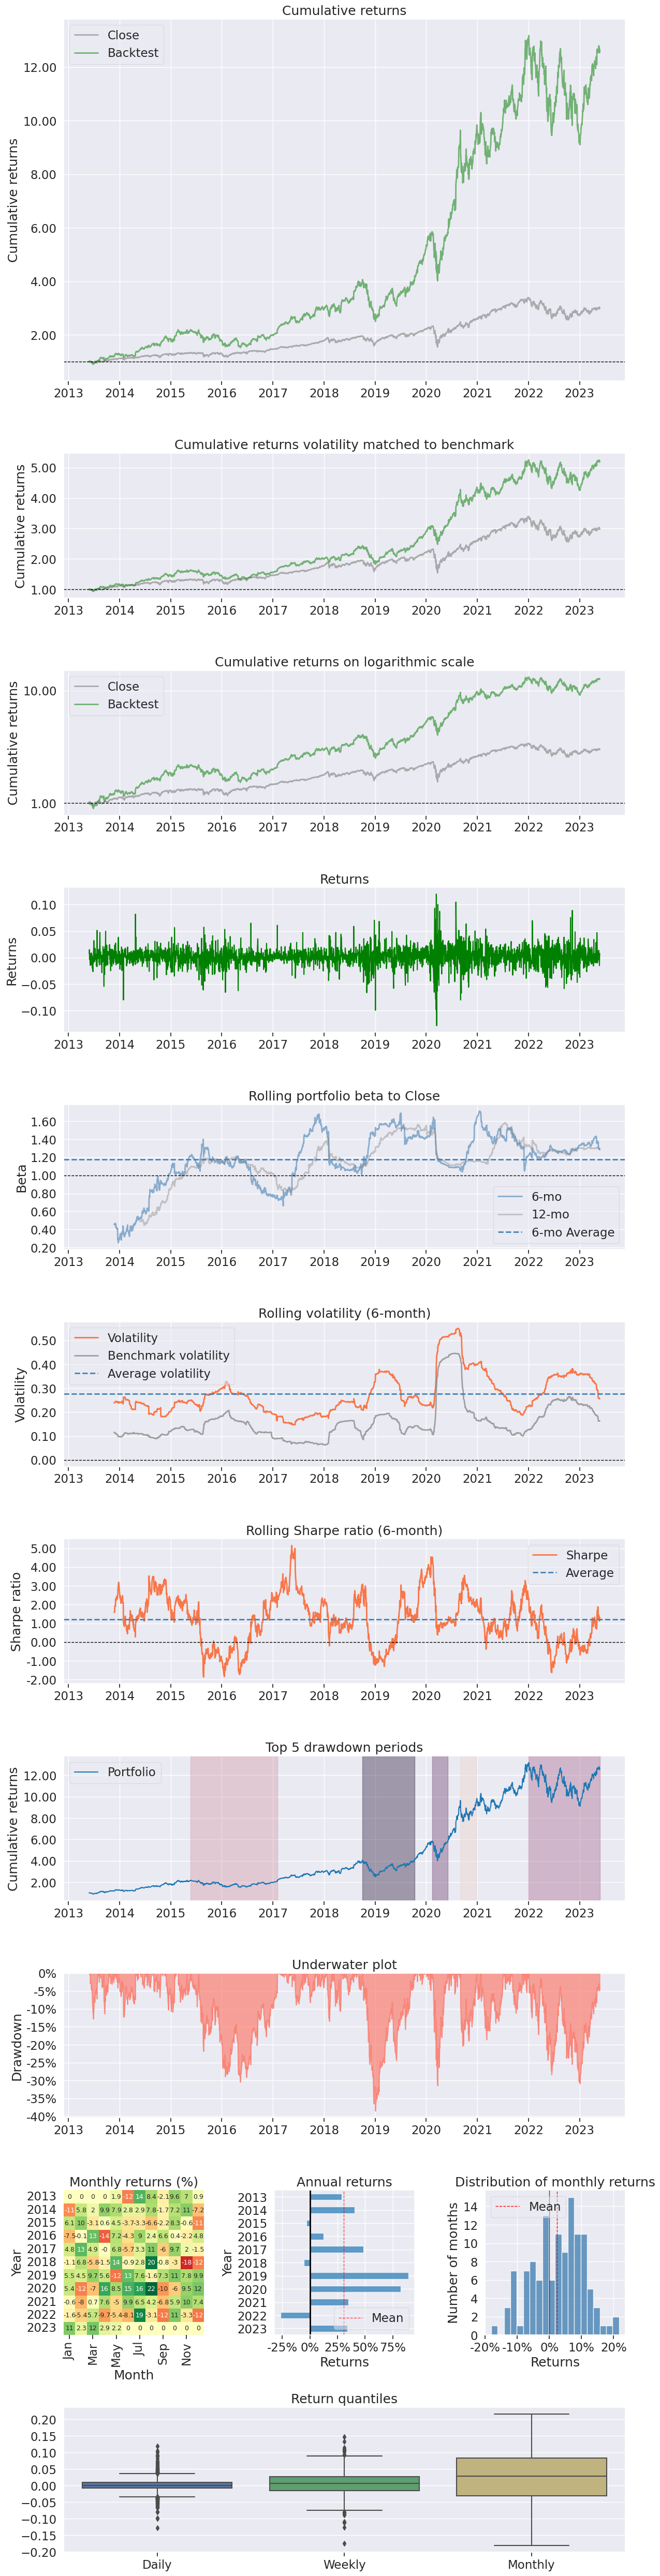

In [ ]:
#  Create tearsheet
fig = pf.create_returns_tear_sheet(AAPL_returns, benchmark_rets=SPY_returns, return_fig=True)
#  Store plots in a fil
file_name = f"{symbol}_tearsheet.png"
fig.savefig(file_name, format="png")

## References

https://blog.jovian.com/torch-logistic-regression-on-iris-dataset-d966b23339da

https://www.kaggle.com/aaditkapoor1201/iris-classification-pytorch

https://campus.datacamp.com/courses/introduction-to-portfolio-analysis-in-python/performance-attribution?ex=12